In [71]:
library(tidyverse) ; library(rio)

DataTitanic<- import("https://ai.lange-analytics.com/data/Titanic.csv")
head(DataTitanic)

,Survived,Pclass,Name,Sex,Age,SiblingsSpousesAboard,ParentsChildrenAboard,FareInPounds
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>
1,0,3,Mr. Owen Harris Braund,male,22,1,0,7.2500
2,1,1,Mrs. John Bradley Cumings,female,38,1,0,71.2833
3,1,3,Miss. Laina Heikkinen,female,26,0,0,7.9250
4,1,1,Mrs. Jacques Heath Futrelle,female,35,1,0,53.1000
5,0,3,Mr. William Henry Allen,male,35,0,0,8.0500
6,0,3,Mr. James Moran,male,27,0,0,8.4583


In [72]:
DataAnalysis<- DataTitanic |>
select( Survived, Sex, Pclass ) |>
mutate( Survived= as.logical(	Survived))

In [73]:
DataWomen=DataAnalysis |>
filter(Sex == "female")
DataMen=DataAnalysis |>
filter(Sex == "male")
head(DataWomen)
head(DataMen)

,Survived,Sex,Pclass
,<lgl>,<chr>,<int>
1,TRUE,female,1
2,TRUE,female,3
3,TRUE,female,1
4,TRUE,female,3
5,TRUE,female,2
6,TRUE,female,3


,Survived,Sex,Pclass
,<lgl>,<chr>,<int>
1,FALSE,male,3
2,FALSE,male,3
3,FALSE,male,3
4,FALSE,male,1
5,FALSE,male,3
6,FALSE,male,3


In [74]:
FemSurv=sum(DataWomen$Survived)
FemTotal=length(DataWomen$Survived)
FemSurvRate= FemSurv/FemTotal
cat("The survival rate for wommen is:",FemSurvRate)

The survival rate for wommen is: 0.7420382

In [75]:
MaleSurv=sum(as.numeric(DataMen$Survived))

MaleTotal=length(as.numeric(DataMen$Survived))
MaleSurvRate= MaleSurv/MaleTotal
cat("The survival rate for Men is:", MaleSurvRate)

The survival rate for Men is: 0.1902269

In [76]:
MaleSurvRate= mean(DataMen$Survived)
cat("The survival rate for men is",MaleSurvRate)

The survival rate for men is 0.1902269

In [77]:
cat("The survival rate for women is:", FemSurvRate, "\n", 
"The survival rate for men is:", MaleSurvRate )

The survival rate for women is: 0.7420382 
 The survival rate for men is: 0.1902269

In [78]:
ModelPropFemaleVsMale=prop.test(c(FemSurv, MaleSurv),
c(FemTotal, MaleTotal))

print(ModelPropFemaleVsMale)



	2-sample test for equality of proportions with continuity correction

data:  c(FemSurv, MaleSurv) out of c(FemTotal, MaleTotal)
X-squared = 258.39, df = 1, p-value < 2.2e-16
alternative hypothesis: two.sided
95 percent confidence interval:
 0.4912560 0.6123667
sample estimates:
   prop 1    prop 2 
0.7420382 0.1902269 



In [79]:
DataClass1= DataAnalysis |>
filter( Pclass == 1)
DataClass2= DataAnalysis |>
filter( Pclass == 2)
DataClass3= DataAnalysis |>
filter( Pclass == 3)
Class1SurvRate= mean(DataClass1$Survived )
Class2SurvRate=  mean(DataClass2$Survived )
Class3SurvRate=  mean(DataClass3$Survived )
cat("Survival rate in class 1:", Class1SurvRate, "\n")
cat("Survival rate in class 2:", Class2SurvRate, "\n")
cat("Survival rate in class 3:", Class3SurvRate, "\n")

Survival rate in class 1: 0.6296296 
Survival rate in class 2: 0.4728261 
Survival rate in class 3: 0.2443532 


## Chepter 4- KNN

In [80]:
packages= c( "rio", "janitor", "tidymodels", "kableExtra",
 "learnr",   "shiny",   "kknn"  )

 for( x in packages){
    if(!requireNamespace(x)) {
      install.packages(x,  quietly = TRUE)
    }
 library(x, character.only = TRUE)
 }

In [81]:
DataWine=import("https://ai.lange-analytics.com/data/WineData.rds") |>
clean_names("upper_camel") |>
select(WineColor, Sulfur=TotalSulfurDioxide, Acidity)

Warning message:
"Missing `trust` will be set to FALSE by default for RDS in 2.0.0."


In [82]:
set.seed(876)
Split7030 = initial_split( DataWine, prop= .7, strata= WineColor)

DataTrain=training(Split7030)
DataTest=testing(Split7030)


In [83]:
DataWine=import("https://ai.lange-analytics.com/data/WineData.rds") |>
clean_names("upper_camel") |>
select(WineColor, Sulfur=TotalSulfurDioxide, Acidity) |>
mutate(WineColor=as.factor(WineColor))
head(DataWine)

Warning message:
"Missing `trust` will be set to FALSE by default for RDS in 2.0.0."


,WineColor,Sulfur,Acidity
,<fct>,<dbl>,<dbl>
1,red,37,10.8
2,white,213,6.4
3,white,139,9.4
4,white,90,8.2
5,white,183,6.4
6,red,38,6.7


In [84]:
set.seed(876)
Split7030=initial_split(DataWine, prop=0.7, strata=WineColor)
DataTrain=training(Split7030)
DataTest=testing(Split7030)
head(DataTrain)

,WineColor,Sulfur,Acidity
,<fct>,<dbl>,<dbl>
1,red,37,10.8
2,red,38,6.7
3,red,12,7.5
4,red,25,7.1
5,red,114,8.0
6,red,66,7.6


In [85]:
RecipeWine = recipe( WineColor~ Acidity+ Sulfur, data= DataTrain) %>%
    step_normalize(all_predictors()) |>
    step_naomit ()

    RecipeWine



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Centering and scaling for: all_predictors()

• Removing rows with NA values in: <none>



In [86]:
ModelDesignKNN=nearest_neighbor(neighbors=4,
weight_func="rectangular") |>
set_engine("kknn") |>
set_mode("classification")


ModelDesignKNN

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 4
  weight_func = rectangular

Computational engine: kknn 


In [87]:
WFModelWine=workflow() |>
add_recipe(RecipeWine) |>
add_model(ModelDesignKNN) |>
fit(DataTrain)

In [88]:
DataTestWithPred=augment(WFModelWine, DataTest)
head(DataTestWithPred)

.pred_class,.pred_red,.pred_white,WineColor,Sulfur,Acidity
<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
white,0.25,0.75,white,90,8.2
red,1.00,0.00,red,19,11.8
white,0.00,1.00,white,220,6.7
white,0.25,0.75,red,131,7.8
white,0.00,1.00,white,161,7.0
red,1.00,0.00,red,41,9.9


In [89]:
ConfMatrixWine=conf_mat(DataTestWithPred, truth=WineColor,
estimate=.pred_class)
print(ConfMatrixWine)

          Truth
Prediction red white
     red   436    46
     white  44   434


In [90]:

DataWine=import("https://ai.lange-analytics.com/data/WineData.rds") |>
clean_names("upper_camel") |>
select(-Quality) |>
rename(Sulfur=TotalSulfurDioxide) |>
mutate(WineColor=as.factor(WineColor))

set.seed(876)
Split7030=initial_split(DataWine, prop=0.7, strata=WineColor)
DataTrain=training(Split7030)
DataTest=testing(Split7030)
head(DataTrain)

Warning message:
"Missing `trust` will be set to FALSE by default for RDS in 2.0.0."


,WineColor,Acidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,Sulfur,Density,PH,Sulphates,Alcohol
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,red,10.8,0.320,0.44,1.6,0.063,16,37,0.99850,3.22,0.78,10.00
2,red,6.7,0.855,0.02,1.9,0.064,29,38,0.99472,3.30,0.56,10.75
3,red,7.5,0.380,0.57,2.3,0.106,5,12,0.99605,3.36,0.55,11.40
4,red,7.1,0.270,0.60,2.1,0.074,17,25,0.99814,3.38,0.72,10.60
5,red,8.0,0.580,0.28,3.2,0.066,21,114,0.99730,3.22,0.54,9.40
6,red,7.6,0.400,0.29,1.9,0.078,29,66,0.99710,3.45,0.59,9.50


In [91]:
RecipeWine = recipe( WineColor~., data= DataTrain) |>
    step_naomit() |>
    step_normalize(all_predictors())
    
  RecipeWine



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:    1
predictor: 11



── Operations 

• Removing rows with NA values in: <none>

• Centering and scaling for: all_predictors()



In [92]:
ModelDesignKNN= nearest_neighbor(neighbors = 4, weight_func = "rectangular") |>
      set_engine("kknn") |>
      set_mode("classification")

      ModelDesignKNN

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 4
  weight_func = rectangular

Computational engine: kknn 


In [93]:
WFModelWine=workflow() |>
add_recipe(RecipeWine) |>
add_model(ModelDesignKNN) |>
fit(DataTrain)
print(WFModelWine)

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_naomit()
• step_normalize()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(4,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.01519214
Best kernel: rectangular
Best k: 4


In [94]:
DataTestWithPred=augment(WFModelWine, DataTest)
conf_mat(DataTestWithPred, truth=WineColor, estimate=.pred_class)

          Truth
Prediction red white
     red   474     2
     white   6   478

In [95]:
MetricsWine=metric_set(accuracy, sensitivity, specificity)
MetricsWine(DataTestWithPred, truth=WineColor, estimate=.pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9916667
sensitivity,binary,0.9875000
specificity,binary,0.9958333


In [96]:
DataMnist=import("https://ai.lange-analytics.com/data/MN500.rds") |>
mutate(Label=as.factor(Label))
set.seed(123)
Split7030=initial_split(DataMnist, 0.70, strata=Label)
DataTrain=training(Split7030)
DataTest=testing(Split7030)
head(DataTrain)

Warning message:
"Missing `trust` will be set to FALSE by default for RDS in 2.0.0."


,Label,Pix1,Pix2,Pix3,Pix4,Pix5,Pix6,Pix7,Pix8,Pix9,⋯,Pix775,Pix776,Pix777,Pix778,Pix779,Pix780,Pix781,Pix782,Pix783,Pix784
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [97]:
RecipeMnist=recipe(Label~., data=DataTrain) |>
 step_naomit() |> 
 step_normalize()
 RecipeMnist



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:     1
predictor: 784



── Operations 

• Removing rows with NA values in: <none>

• Centering and scaling for: <none>



In [98]:
ModelDesignKNN=nearest_neighbor(neighbors=5, weight_func="rectangular") |>
    set_engine("kknn")|>
    set_mode("classification")
    ModelDesignKNN

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 5
  weight_func = rectangular

Computational engine: kknn 


In [99]:
WFModelMnist=workflow() |>
add_recipe(RecipeMnist) |>
add_model(ModelDesignKNN) |>
fit(DataTrain)
print(WFModelMnist)

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_naomit()
• step_normalize()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(5,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2557471
Best kernel: rectangular
Best k: 5


In [100]:
DataTestWithPred=augment(WFModelMnist, DataTest)
head(DataTestWithPred) |> 
  select(Label, .pred_class, everything())

Label,.pred_class,.pred_0,.pred_1,.pred_2,.pred_3,.pred_4,.pred_5,.pred_6,.pred_7,⋯,Pix775,Pix776,Pix777,Pix778,Pix779,Pix780,Pix781,Pix782,Pix783,Pix784
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2,2,0,0,0.8,0.2,0.0,0.0,0,0.0,⋯,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0.0,0.0,0.0,0.0,0,0.0,⋯,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0.0,0.0,0.8,0.0,0,0.0,⋯,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0.0,0.0,0.6,0.0,0,0.2,⋯,0,0,0,0,0,0,0,0,0,0
5,5,0,0,0.0,0.0,0.4,0.6,0,0.0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,1,0,0.0,0.0,0.0,0.0,0,0.0,⋯,0,0,0,0,0,0,0,0,0,0


In [101]:
conf_mat(DataTestWithPred, truth=Label, estimate = .pred_class)

          Truth
Prediction  0  1  2  3  4  5  6  7  8  9
         0  9  0  1  0  0  0  1  0  0  0
         1  0 18  3  1  2  2  1  1  0  0
         2  0  0 10  0  0  0  0  0  0  0
         3  1  0  1 11  0  0  0  0  0  0
         4  1  0  0  1 16  0  0  0  0  1
         5  0  0  0  1  0 12  2  0  0  0
         6  0  0  0  0  0  0 11  0  0  0
         7  0  0  1  0  0  0  0  7  0  2
         8  0  0  0  0  0  0  0  0 11  0
         9  0  0  0  0  1  1  0  7  2 13

In [102]:
MetricsSetMnist=metric_set(accuracy, sensitivity, specificity)
MetricsSetMnist(DataTestWithPred, truth=Label, estimate=.pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.7763158
sensitivity,macro,0.7729655
specificity,macro,0.9749462


In [103]:
DataMockup=
import("https://ai.lange-analytics.com/data/DataStudyTimeMockup.rds")
VecBeta=c(4, 61)
DataTable=DataMockup |>
mutate(PredGrade=VecBeta[1]*StudyTime+VecBeta[2]) |>
mutate(Error=PredGrade-Grade) |>
mutate(ErrorSq=Error^2)
MSE=mean(DataTable$ErrorSq)
cat("The MSE for VecBeta[1]=4 and VecBeta[2]=61 is:", MSE )

Warning message:
"Missing `trust` will be set to FALSE by default for RDS in 2.0.0."


The MSE for VecBeta[1]=4 and VecBeta[2]=61 is: 29.8

In [104]:
SumOfX=sum(DataMockup$StudyTime)
SumOfY=sum(DataMockup$Grade)

In [105]:
DataTable=DataMockup |>
mutate(GradeXStudyTime=Grade*StudyTime) |>
mutate(StudyTimeSquared=StudyTime^2)

In [106]:
N=5
SumOfY=sum(DataTable$Grade)
SumOfX=sum(DataTable$StudyTime)
SumOfXY=sum(DataTable$GradeXStudyTime)
SumOfXSq=sum(DataTable$StudyTimeSquared)
Beta1opt=(N*SumOfXY-SumOfX*SumOfY)/(N*SumOfXSq-SumOfX^2)
cat("Based on the training dataset the optimal value for Beta1 =",
Beta1opt)

Based on the training dataset the optimal value for Beta1 = 3.962687

In [107]:
Beta2opt= (SumOfY-Beta1opt*SumOfX)/N
cat("Based on the training dataset the optimal value for Beta2 =",
Beta2opt)

Based on the training dataset the optimal value for Beta2 = 64.1791

In [108]:
library(tidymodels)
RecipeMockup=recipe(Grade~StudyTime, data=DataMockup)
ModelDesignLinRegr=linear_reg() |>
set_engine("lm") |>
set_mode("regression")
WFModelMockup=workflow() |>
add_recipe(RecipeMockup) |>
add_model(ModelDesignLinRegr) |>
fit(DataMockup)
tidy(WFModelMockup)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),64.179104,6.059962,10.590678,0.001798593
StudyTime,3.962687,1.137132,3.484809,0.039916217


In [109]:
FctMSE=import("https://ai.lange-analytics.com/source/FctMSE.rds")
DataMockup=
import("https://ai.lange-analytics.com/data/DataStudyTimeMockup.rds")
VecBeta1Values=seq(3, 5, 0.01) #creates 201 beta1 values
VecBeta2Values=seq(50, 70, 0.1)#creates 201 beta2 values
GridBetaPairs=expand.grid(Beta1=VecBeta1Values, Beta2=VecBeta2Values)
cat("GridBetaPairs has", nrow(GridBetaPairs), "rows.")
VecMSE=apply(GridBetaPairs, FUN=FctMSE,data=DataMockup,MARGIN=1)
GridBetaPairs=mutate(GridBetaPairs, MSE=VecMSE)
BestModel=filter(GridBetaPairs, MSE==min(MSE))
print(BestModel)

Warning message:
"Missing `trust` will be set to FALSE by default for RDS in 2.0.0."
Warning message:
"Missing `trust` will be set to FALSE by default for RDS in 2.0.0."


GridBetaPairs has 40401 rows.  Beta1 Beta2      MSE
1  3.96  64.2 20.79264


In [110]:
VecBetaFirstTrial=c(4, 61)
BestModel=optim(VecBetaFirstTrial, FctMSE, data=DataMockup)
cat("Optimal parameters values fo beta1 and beta2:", BestModel$par)
cat("\n","Minuimum MSE:", BestModel$value)

Optimal parameters values fo beta1 and beta2: 3.962824 64.17815
 Minuimum MSE: 20.79254

In [114]:
DataHousing= import("https://ai.lange-analytics.com/data/HousingData.csv") |>
  clean_names("upper_camel") |>
  select(Price, Sqft=SqftLiving, Grade, Waterfront)

set.seed(777)
Split7030=initial_split(DataHousing, prop=0.7, strata=Price, breaks=5)
DataTrain=training(Split7030)
DataTest=testing(Split7030)
head(DataTrain)

,Price,Sqft,Grade,Waterfront
,<dbl>,<int>,<int>,<chr>
1,221900,1180,7,no
2,180000,770,6,no
3,189000,1200,7,no
4,230000,1250,7,no
5,252700,1070,7,no
6,240000,1220,7,no


In [122]:
library(tidymodels)
RecipeHouses=recipe(Price~., data=DataTrain) |>
step_dummy(Waterfront) # |> 
#step_dummy(Grade)


RecipeHouses



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 3



── Operations 

• Dummy variables from: Waterfront



In [123]:
ModelDesignHouses=linear_reg() |>
set_engine("lm") |>
set_mode("regression")
print(ModelDesignHouses)

Linear Regression Model Specification (regression)

Computational engine: lm 



In [124]:
WFModelHouses=workflow() |>
add_recipe(RecipeHouses) |>
add_model(ModelDesignHouses) |>
fit(DataTrain)
print(WFModelHouses)

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_dummy()

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
   (Intercept)            Sqft           Grade  Waterfront_yes  
     -570056.2           179.6         95214.1        868338.1  



In [125]:
ResultsTidy=tidy(WFModelHouses)
print(ResultsTidy)

# A tibble: 4 × 5
  term           estimate std.error statistic   p.value
  <chr>             <dbl>     <dbl>     <dbl>     <dbl>
1 (Intercept)    -570056.  15133.       -37.7 6.63e-297
2 Sqft               180.      3.25      55.2 0        
3 Grade            95214.   2548.        37.4 1.65e-292
4 Waterfront_yes  868338.  22200.        39.1 7.12e-319


In [127]:
DataTestWithPred=augment(WFModelHouses, DataTest)
head(DataTestWithPred)

.pred,.resid,Price,Sqft,Grade,Waterfront
<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
1450646.9,-220646.866,1230000,5420,11,no
404430.0,-146929.999,257500,1715,7,no
286802.2,5047.814,291850,1060,7,no
416103.0,-186602.988,229500,1780,7,no
421490.5,108509.479,530000,1810,7,no
816645.0,-166645.036,650000,2950,9,no


In [128]:
metrics(DataTestWithPred,truth=Price, estimate=.pred)


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,2.446563e+05
rsq,standard,5.488493e-01
mae,standard,1.633577e+05


In [129]:
DataHousing= import("https://ai.lange-analytics.com/data/HousingData.csv") |>
clean_names("upper_camel") |>
select(Price, Sqft=SqftLiving)
set.seed(777)
Split001=DataHousing |>
initial_split(prop=0.001, strata=Price, breaks=5)
DataTrain=training(Split001)
DataTest=testing(Split001)

In [130]:
ModelDesignLinRegr=linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

RecipeHouses=recipe(Price~., data=DataTrain) |>
  step_mutate(Sqft2=Sqft^2, Sqft3=Sqft^3,
    Sqft4=Sqft^4,Sqft5=Sqft^5)

In [135]:
WFModelHouses=workflow() |>
add_recipe(RecipeHousesPoly10) |>
add_model(ModelDesignLinRegr) |>
fit(DataTrain)

In [136]:
DataTrainWithPred=augment(WFModelHouses, DataTrain)
metrics(DataTrainWithPred, truth=Price, estimate=.pred)

Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response", :
"prediction from rank-deficient fit; consider predict(., rankdeficient="NA")"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.234627e+05
rsq,standard,7.669549e-01
mae,standard,8.758509e+04


In [137]:
DataTestWithPred=augment(WFModelHouses, DataTest)
metrics(DataTestWithPred, truth=Price, estimate=.pred)

Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response", :
"prediction from rank-deficient fit; consider predict(., rankdeficient="NA")"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.437378e+11
rsq,standard,3.551657e-03
mae,standard,1.255949e+09


In [134]:
RecipeHousesPoly10=recipe(Price~., data=DataTrain) |>
step_poly(Sqft, degree=10,
options=list(raw=TRUE))

In [138]:
DataHousing=
import("https://ai.lange-analytics.com/data/HousingData.csv") |>
clean_names("upper_camel") |>
select(Price, Sqft=SqftLiving)
set.seed(987)
Split80=DataHousing |>
initial_split(prop=0.8, strata=Price, breaks=5)
DataTrain=training(Split80)
DataTest=testing(Split80)

In [143]:
RecipeHousesPolynomOLS=recipe(Price~., data=DataTrain) |>
    step_poly(Sqft, degree=tune(),
    options=list(raw=TRUE))

ModelDesignLinRegr=linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

TuneWFModelHouses=workflow() |>
    add_model(ModelDesignLinRegr) |>
    add_recipe(RecipeHousesPolynomOLS)

(TuneWFModelHouses)

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_poly()

── Model ───────────────────────────────────────────────────────────────────────
Linear Regression Model Specification (regression)

Computational engine: lm 


In [141]:
degree()

Polynomial Degree (quantitative)

Range: [1, 3]



In [144]:
ParGridHouses=data.frame(degree=c(1:10))
print(ParGridHouses)

   degree
1       1
2       2
3       3
4       4
5       5
6       6
7       7
8       8
9       9
10     10


In [145]:
set.seed(987)
FoldsHouses=vfold_cv(DataTrain, v=4, strata=Price)

In [146]:
TuneResultsHouses = tune_grid(
  TuneWFModelHouses,
  resamples = FoldsHouses,
  grid = ParGridHouses,
  metrics = metric_set(rmse, rsq, mae)
)

In [149]:
show_best(TuneResultsHouses, metric="rmse")

degree,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
6,rmse,standard,251993.2,4,6178.924,Preprocessor06_Model1
8,rmse,standard,252979.4,4,5970.989,Preprocessor08_Model1
2,rmse,standard,255965.4,4,7242.560,Preprocessor02_Model1
3,rmse,standard,257680.0,4,7875.282,Preprocessor03_Model1
4,rmse,standard,260994.4,4,9910.966,Preprocessor04_Model1


In [150]:
show_best(TuneResultsHouses, metric="rsq")

degree,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
6,rsq,standard,0.5221488,4,0.03044902,Preprocessor06_Model1
8,rsq,standard,0.5206216,4,0.01100445,Preprocessor08_Model1
2,rsq,standard,0.5133846,4,0.02767141,Preprocessor02_Model1
3,rsq,standard,0.5075231,4,0.02262356,Preprocessor03_Model1
4,rsq,standard,0.4981964,4,0.02952974,Preprocessor04_Model1


In [151]:
show_best(TuneResultsHouses, metric="mae")

degree,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
6,mae,standard,165798.0,4,1923.949,Preprocessor06_Model1
8,mae,standard,165868.2,4,1763.840,Preprocessor08_Model1
4,mae,standard,166324.8,4,2137.203,Preprocessor04_Model1
3,mae,standard,166434.4,4,1863.376,Preprocessor03_Model1
2,mae,standard,166545.7,4,1840.370,Preprocessor02_Model1


In [158]:
BestHyperPar=select_best(TuneResultsHouses, metric ="rmse")
print(BestHyperPar)

# A tibble: 1 × 2
  degree .config              
   <int> <chr>                
1      6 Preprocessor06_Model1


In [159]:
BestWFModelHouses=TuneWFModelHouses |>
finalize_workflow(BestHyperPar) |>
fit(DataTrain)
print(BestWFModelHouses)

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_poly()

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)  Sqft_poly_1  Sqft_poly_2  Sqft_poly_3  Sqft_poly_4  Sqft_poly_5  
 -1.297e+04    6.569e+02   -4.902e-01    2.051e-04   -3.758e-08    3.184e-12  
Sqft_poly_6  
 -9.933e-17  



In [162]:
DataTestWithPredBestModel=augment(BestWFModelHouses, DataTest)
metrics(DataTestWithPredBestModel, truth=Price, estimate=.pred)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,2.407062e+05
rsq,standard,5.856548e-01
mae,standard,1.649870e+05


## Machine learning Genarall tamplate

In [ ]:
#Step 1 - Generate Training and Testing Data

set.seed(987)
Split80=MyData |>
initial_split(prop=0.8, strata=<OUTCOME VARIABLE>, breaks=5) #Breaks Use only for continous variable
DataTrain=training(Split80)
DataTest=testing(Split80)

In [ ]:
# Step 2 - Create a Recipe

Recipe=recipe(<OUTCOME VARIABLE>~<PREDICTOR VARIABLE(S)>, data=DataTrain) |>
  step_<NAME OF STEP>(<ARGUMENT(S) OF STEP>) # Exmple: step_naomit( all_predictors() )
  


In [ ]:
# Step 3 - Create a Model Design
ModelDesign=<NAME OF ML-COMMAND>(<ARGUMENT(S) OF COMMAND>) |>  
 #Example: <NAME OF ML-COMMAND>= nearest_neighbor 
 # Example: <ARGUMENT(S) OF COMMAND>= neighbors = 4, weight_func = "rectangular"
set_engine("<PACKAGE NAME>") |> # Example: <PACKAGE NAME>= "kknn"
set_mode("<MODE>")  # <MODE> either regression or classification 


In [ ]:
Step 4 - Add the Recipe and the Model Design to a Workflow

TuneWFModel=workflow() |>
    add_recipe(Recipe) |>
    add_model(ModelDesign)

    

In [ ]:
# Step 5 - Create a Hyper-Parameter Grid

ParGrid=data.frame(<HYPER-PAR1>=c(<LIST OF VALUES>),
      <HYPER-PAR2>=c(<LIST OF VALUES>), <ETC>)
 #Example: ParGrid=data.frame(neighbors=c(1,3,6))
 

In [ ]:
#Step 6 - Create Resamples for Cross-Validation
FoldsForTuning=vfold_cv(DataTrain, v=10, strata=<OUTCOME VARIABLE>)

In [ ]:
# Step 7 - Tune the Workflow and Train All Models 
TuneResults=tune_grid(TuneWFModel, resamples=FoldsForTuning,
    grid=ParGrid, 
    metrics=metric_set(<LIST OF METRICS>)), #Ex: <LIST OF METRICS>= rmse, rsq, mae
    control_grid(verbose=TRUE))

In [ ]:
# Step 8 - Extract the Best Hyper-Parameter(s)

BestHyperPar=select_best(TuneResults, "<METRIC>") # Ex: <METRIC>= rmse



In [ ]:
# Step 9 - Finalize and Train the Best Workflow Model 

BestWFModel=TuneWFModel |>
    finalize_workflow(BestHyperPar) |>
    fit(DataTrain)


In [ ]:
# Step 10 - Assess Prediction Quality Based on the Testing Data

DataTestWithPredBestModel=augment(BestWFModel, DataTest)
metrics(DataTestWithPredBestModel, truth=<OUTCOME VARIABLE>, estimate=.pred)

In [171]:
DataWine=import("https://ai.lange-analytics.com/data/WineData.rds") |>
clean_names("upper_camel") |>
rename(Sulfur=TotalSulfurDioxide) |>
mutate(WineColor=as.factor(WineColor))

head(DataWine)

Warning message:
"Missing `trust` will be set to FALSE by default for RDS in 2.0.0."


,WineColor,Acidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,Sulfur,Density,PH,Sulphates,Alcohol,Quality
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,red,10.8,0.320,0.44,1.6,0.063,16,37,0.99850,3.22,0.78,10.00,6
2,white,6.4,0.310,0.39,7.5,0.040,57,213,0.99475,3.32,0.43,10.00,5
3,white,9.4,0.280,0.30,1.6,0.045,36,139,0.99534,3.11,0.49,9.30,5
4,white,8.2,0.220,0.36,6.8,0.034,12,90,0.99440,3.01,0.38,10.50,8
5,white,6.4,0.290,0.44,3.6,0.197,75,183,0.99420,3.01,0.38,9.10,5
6,red,6.7,0.855,0.02,1.9,0.064,29,38,0.99472,3.30,0.56,10.75,6


In [173]:
set.seed(876)
Split7030=initial_split(DataWine, prop=0.7, strata=WineColor)
DataTrain=training(Split7030)
DataTest=testing(Split7030)
head(DataTrain)

,WineColor,Acidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,Sulfur,Density,PH,Sulphates,Alcohol,Quality
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,red,10.8,0.320,0.44,1.6,0.063,16,37,0.99850,3.22,0.78,10.00,6
2,red,6.7,0.855,0.02,1.9,0.064,29,38,0.99472,3.30,0.56,10.75,6
3,red,7.5,0.380,0.57,2.3,0.106,5,12,0.99605,3.36,0.55,11.40,6
4,red,7.1,0.270,0.60,2.1,0.074,17,25,0.99814,3.38,0.72,10.60,6
5,red,8.0,0.580,0.28,3.2,0.066,21,114,0.99730,3.22,0.54,9.40,6
6,red,7.6,0.400,0.29,1.9,0.078,29,66,0.99710,3.45,0.59,9.50,6


In [176]:
Recipe= recipe( WineColor~., data=DataTrain ) |>
    step_naomit() |>
    step_rm( Quality ) |>
    step_normalize(all_predictors() )

In [178]:
ModelDesign=nearest_neighbor(neighbors= tune(), weight_func = "rectangular" ) |>
    set_engine("kknn") |>
    set_mode("classification")
print(ModelDesign)

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 



In [182]:
TuneWFModel=workflow() |>
    add_recipe(Recipe) |>
    add_model(ModelDesign)
print(TuneWFModel)

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_naomit()
• step_rm()
• step_normalize()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 



In [183]:
ParGrid=data.frame(neighbors=c(1:15))
print(ParGrid)

   neighbors
1          1
2          2
3          3
4          4
5          5
6          6
7          7
8          8
9          9
10        10
11        11
12        12
13        13
14        14
15        15


In [185]:
set.seed(123)
FoldsForTuning=vfold_cv(DataTrain, v=5, strata=WineColor)
print(FoldsForTuning)

#  5-fold cross-validation using stratification 
# A tibble: 5 × 2
  splits             id   
  <list>             <chr>
1 <split [1790/448]> Fold1
2 <split [1790/448]> Fold2
3 <split [1790/448]> Fold3
4 <split [1790/448]> Fold4
5 <split [1792/446]> Fold5


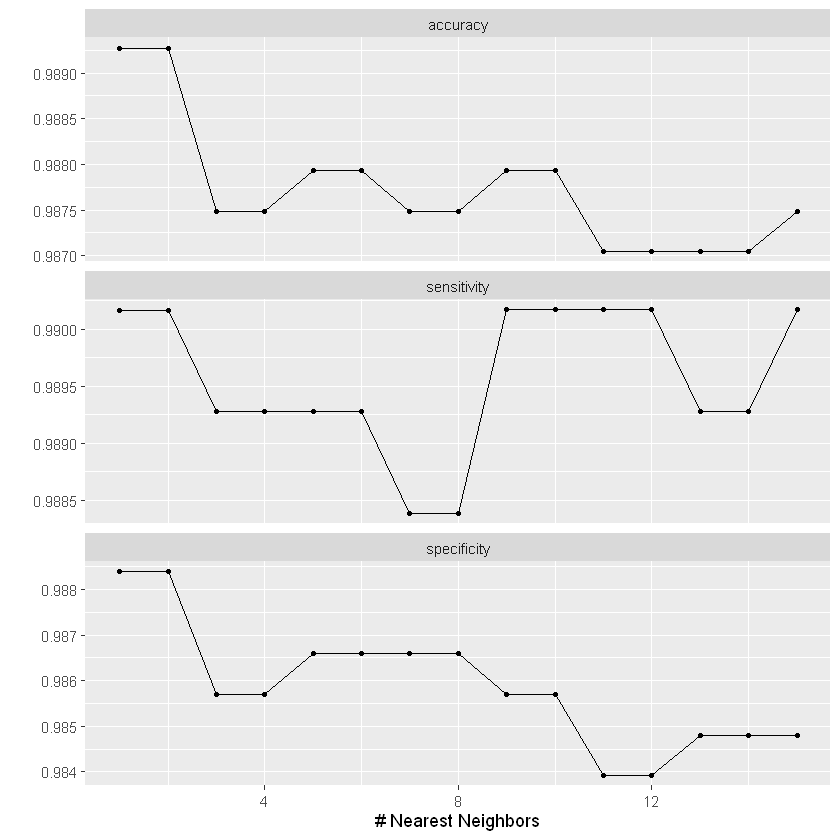

In [187]:
TuneResults=tune_grid(TuneWFModel, resamples=FoldsForTuning,
grid=ParGrid, metrics=metric_set(accuracy,sensitivity, specificity))
autoplot(TuneResults)

In [193]:
BestHyperPar=select_best(TuneResults, metric ="accuracy")
print(BestHyperPar)

# A tibble: 1 × 2
  neighbors .config              
      <int> <chr>                
1         1 Preprocessor1_Model01


In [194]:
WFModelBest=TuneWFModel |>
finalize_workflow(BestHyperPar) |>
fit(DataTrain)
print(WFModelBest)

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_naomit()
• step_rm()
• step_normalize()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(1L,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.009383378
Best kernel: rectangular
Best k: 1


In [196]:
DataTestWithPredBestModel=augment(WFModelBest, DataTest)
conf_mat(DataTestWithPredBestModel, truth=WineColor,
estimate=.pred_class)

          Truth
Prediction red white
     red   474     7
     white   6   473

In [197]:
DataHousing= import("https://ai.lange-analytics.com/data/HousingData.csv") |>
clean_names("upper_camel") |>
select(Price, Sqft=SqftLiving)
set.seed(777)
Split001=initial_split(DataHousing, prop=0.001, strata=Price, breaks=5)
DataTrain=training(Split001)
DataTest=testing(Split001)

In [199]:
ModelDesignBenchmark=linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

RecipeHouses=recipe(Price~., data=DataTrain) |>
    step_mutate(Sqft2=Sqft^2,Sqft3=Sqft^3, Sqft4=Sqft^4,Sqft5=Sqft^5) |>
    step_normalize(all_predictors()) 

WFModelBenchmark=workflow() |>
    add_model(ModelDesignBenchmark) |>
    add_recipe(RecipeHouses) |>
    fit(DataTrain) 

In [200]:
tidy(WFModelBenchmark)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),509945.1,36462.91,13.9853114,1.280952e-09
Sqft,8853783.4,10515448.44,0.8419787,4.139521e-01
Sqft2,-50947114.0,54352074.80,-0.9373536,3.644666e-01
Sqft3,112589221.8,111217647.05,1.0123323,3.285562e-01
Sqft4,-106894259.5,101985737.56,-1.0481295,3.123374e-01
Sqft5,36592434.9,34688740.91,1.0548793,3.093459e-01


In [201]:
DataTrainWithPredBenchmark=augment(WFModelBenchmark, DataTrain)
metrics(DataTrainWithPredBenchmark, truth=Price, estimate=.pred)


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.364317e+05
rsq,standard,7.154233e-01
mae,standard,1.040470e+05


In [203]:
DataTestWithPredBenchmark=augment(WFModelBenchmark, DataTest)
metrics(DataTestWithPredBenchmark, truth=Price, estimate=.pred)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,9.994024e+07
rsq,standard,2.148349e-02
mae,standard,1.719470e+06


In [204]:
ModelDesignLasso=linear_reg(penalty=500, mixture=1) |>
    set_engine("glmnet") |>
    set_mode("regression")

WFModelLasso=workflow() |>
    add_model(ModelDesignLasso) |>
    add_recipe(RecipeHouses) |>
    fit(DataTrain)

In [205]:
tidy(WFModelLasso)

Warning message:
"package 'glmnet' was built under R version 4.4.3"

Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Loaded glmnet 4.1-9



term,estimate,penalty
<chr>,<dbl>,<dbl>
(Intercept),509945.2,500
Sqft,-460507.8,500
Sqft2,1171966.8,500
Sqft3,0.0,500
Sqft4,0.0,500
Sqft5,-560317.9,500


In [207]:
DataTrainWithPredLasso=augment(WFModelLasso,DataTrain)
metrics(DataTrainWithPredLasso, truth=Price, estimate=.pred)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.449761e+05
rsq,standard,6.791390e-01
mae,standard,1.100075e+05


In [208]:
DataTestWithPredLasso=augment(WFModelLasso, DataTest)
metrics(DataTestWithPredLasso, truth=Price, estimate=.pred)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,4.723086e+06
rsq,standard,2.961055e-02
mae,standard,3.031176e+05


In [209]:
set.seed(777)
ModelDesignRidge=linear_reg(penalty=1000000, mixture=0) |>
    set_engine("glmnet") |>
    set_mode("regression")

WFModelRidge=workflow() |>
    add_model(ModelDesignRidge) |>
    add_recipe(RecipeHouses) |>
fit(DataTrain)

In [210]:
tidy(WFModelRidge)

term,estimate,penalty
<chr>,<dbl>,<dbl>
(Intercept),509945.15,1e+06
Sqft,25790.24,1e+06
Sqft2,23133.42,1e+06
Sqft3,19885.44,1e+06
Sqft4,16968.36,1e+06
Sqft5,14570.48,1e+06


In [211]:
DataTestWithPredRidge=augment(WFModelRidge, DataTest)
metrics(DataTestWithPredRidge, truth=Price, estimate=.pred)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,3.304854e+05
rsq,standard,2.365959e-01
mae,standard,1.864315e+05


In [212]:
set.seed(777)
ModelDesignElastNet=linear_reg(penalty=10000, mixture=0.5) |>
    set_engine("glmnet") |>
    set_mode("regression")

WFModelElastNet=workflow() |>
    add_model(ModelDesignElastNet) |>
    add_recipe(RecipeHouses) |>
fit(DataTrain)

In [213]:
tidy(WFModelElastNet)

term,estimate,penalty
<chr>,<dbl>,<dbl>
(Intercept),509945.15,10000
Sqft,151416.88,10000
Sqft2,89828.43,10000
Sqft3,0.00,10000
Sqft4,0.00,10000
Sqft5,-58922.79,10000


In [214]:
DataTestWithPredElastNet=augment(WFModelElastNet, DataTest)
metrics(DataTestWithPredElastNet, truth = Price, estimate = .pred)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,6.007675e+05
rsq,standard,6.644793e-03
mae,standard,1.807164e+05


In [225]:
DataHousing= import("https://ai.lange-analytics.com/data/HousingData.csv")|>
    clean_names("upper_camel") |>
    select(Price, Sqft=SqftLiving, Bedr=Bedrooms, Year=YrBuilt) |>
  filter(Price<=1300000, Sqft<4500)
  set.seed(777)
  Split005=initial_split(DataHousing, prop=0.005, strata=Price, breaks=5)
  DataTrain=training(Split005)
  DataTest=testing(Split005)

In [226]:
RecipeHousesMultivar=recipe(Price~., data=DataTrain) |>
    step_mutate(Sqft2=Sqft^2,Bedr2=Bedr^2,Year2=Year^2,
    SqftxBedr=Sqft*Bedr,SqftxYear=Sqft*Year,
    BedrxYear=Bedr*Year,Sqft2xBedr=Sqft2*Bedr,
    SqftxBedr2=Sqft*Bedr2,Sqft2xBedr2=Sqft2*Bedr2,
    Sqft2xYear=Sqft2*Year,SqftxYear2=Sqft*Year2,
    Sqft2xYear2=Sqft2*Year2,Bedr2xYear=Bedr2*Year,
    BedrxYear2=Bedr*Year2,Bedr2xYear2=Bedr2*Year2) |>
    step_normalize(all_predictors())

In [228]:
ModelDesignElastNetTune =linear_reg(penalty=tune(), mixture=tune()) |>
set_engine("glmnet") |>
set_mode("regression")

In [229]:
TuneWFModel=workflow() |>
    add_recipe(RecipeHousesMultivar) |>
    add_model(ModelDesignElastNetTune)

In [230]:
ParGridHouses=crossing(mixture=c(0, 0.5, 1),
    penalty=seq(15000, 80000, 1000))
    print(ParGridHouses)

# A tibble: 198 × 2
   mixture penalty
     <dbl>   <dbl>
 1       0   15000
 2       0   16000
 3       0   17000
 4       0   18000
 5       0   19000
 6       0   20000
 7       0   21000
 8       0   22000
 9       0   23000
10       0   24000
# ℹ 188 more rows


In [232]:
FoldsForTuning=vfold_cv(DataTrain, v=3, strata=Price, repeats=10)

In [235]:
TuneResults=tune_grid(TuneWFModel, resamples=FoldsForTuning,
    grid=crossing(ParGridHouses), 
    metrics=metric_set(rmse))#, #Ex: <LIST OF METRICS>= rmse, rsq, mae
   # control_grid(verbose=TRUE))

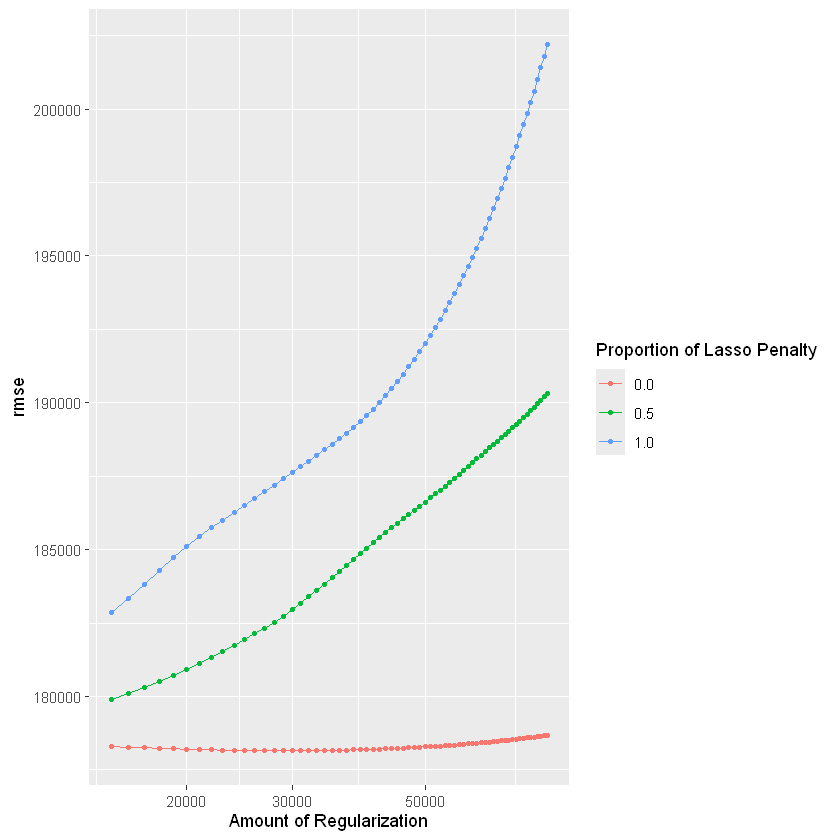

In [237]:
autoplot(TuneResults)

In [241]:
BestHyperPara=select_best(TuneResults, metric="rmse")
print("Best values for the Hyper-Parameters")
BestHyperPara

[1] "Best values for the Hyper-Parameters"


penalty,mixture,.config
<dbl>,<dbl>,<chr>
30000,0,Preprocessor1_Model016


In [245]:
# Step 9: Finalize and Train the Best Workflow
BestWFModel=finalize_workflow(TuneWFModel, BestHyperPara) |>
fit(DataTrain)

In [246]:
print("Optimal Beta Parameters (see estimate column)")
tidy(BestWFModel)

[1] "Optimal Beta Parameters (see estimate column)"


term,estimate,penalty
<chr>,<dbl>,<dbl>
(Intercept),498797.921,30000
Sqft,38397.813,30000
Bedr,1104.529,30000
Year,-24220.583,30000
Sqft2,23903.056,30000
Bedr2,-15660.435,30000
Year2,-22384.671,30000
SqftxBedr,21772.705,30000
SqftxYear,35678.017,30000


In [247]:
DataTestBestWFModelWithPred=augment(BestWFModel, DataTest)
print("Metrics for the Testing Data")
metrics(DataTestBestWFModelWithPred, truth = Price, estimate = .pred)

[1] "Metrics for the Testing Data"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.827754e+05
rsq,standard,3.642435e-01
mae,standard,1.332500e+05


In [251]:
install.packages("glm2")
install.packages("themis")
library(glm2)
library(themis)

Warning message:
"package 'glm2' is in use and will not be installed"
Installing package into 'C:/Users/Nasim/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



also installing the dependencies 'RANN', 'ROSE'




package 'RANN' successfully unpacked and MD5 sums checked
package 'ROSE' successfully unpacked and MD5 sums checked
package 'themis' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Nasim\AppData\Local\Temp\RtmpEbR4Wj\downloaded_packages


Warning message:
"package 'themis' was built under R version 4.4.3"


In [252]:
DataChurn=import("https://ai.lange-analytics.com/data/TelcoData.csv") |>
clean_names("upper_camel") |>
select(Churn,Gender, SeniorCitizen, Tenure, MonthlyCharges) |>
mutate(Churn=factor(Churn, levels=c("Yes", "No")))
head(DataChurn)

,Churn,Gender,SeniorCitizen,Tenure,MonthlyCharges
,<fct>,<chr>,<int>,<int>,<dbl>
1,No,Female,0,1,29.85
2,No,Male,0,34,56.95
3,Yes,Male,0,2,53.85
4,No,Male,0,45,42.30
5,Yes,Female,0,2,70.70
6,Yes,Female,0,8,99.65


In [253]:
set.seed(789)
Split3070=initial_split(DataChurn, prop=0.7, strata=Churn)
DataTrain=training(Split3070)
DataTest=testing(Split3070)
head(DataTrain)

,Churn,Gender,SeniorCitizen,Tenure,MonthlyCharges
,<fct>,<chr>,<int>,<int>,<dbl>
1,No,Female,0,1,29.85
2,No,Male,0,45,42.30
3,No,Male,0,22,89.10
4,No,Female,0,10,29.75
5,No,Male,0,62,56.15
6,No,Male,0,13,49.95


In [254]:
str(DataTrain)

'data.frame':	4929 obs. of  5 variables:
 $ Churn         : Factor w/ 2 levels "Yes","No": 2 2 2 2 2 2 2 2 2 2 ...
 $ Gender        : chr  "Female" "Male" "Male" "Female" ...
 $ SeniorCitizen : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Tenure        : int  1 45 22 10 62 13 58 25 21 12 ...
 $ MonthlyCharges: num  29.9 42.3 89.1 29.8 56.1 ...


In [255]:
RecipeChurn=recipe(Churn~., data=DataTrain) |>
step_dummy(Gender)
print(RecipeChurn)




── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 4



── Operations 

• Dummy variables from: Gender



In [256]:
ModelDesignLogisticRegr=logistic_reg() |>
set_engine("glm") |>
set_mode("classification")
print(ModelDesignLogisticRegr)

Logistic Regression Model Specification (classification)

Computational engine: glm 



In [257]:
WFModelChurn=workflow() |>
add_recipe(RecipeChurn) |>
add_model(ModelDesignLogisticRegr) |>
fit(DataTrain)
print(WFModelChurn)

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: logistic_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_dummy()

── Model ───────────────────────────────────────────────────────────────────────

Call:  stats::glm(formula = ..y ~ ., family = stats::binomial, data = data)

Coefficients:
   (Intercept)   SeniorCitizen          Tenure  MonthlyCharges     Gender_Male  
       1.88649        -0.67032         0.05724        -0.03276        -0.01341  

Degrees of Freedom: 4928 Total (i.e. Null);  4924 Residual
Null Deviance:	    5704 
Residual Deviance: 4346 	AIC: 4356


In [258]:
DataTestWithPred=augment(WFModelChurn, new_data=DataTest)
str(DataTestWithPred)

tibble [2,114 × 8] (S3: tbl_df/tbl/data.frame)
 $ .pred_class   : Factor w/ 2 levels "Yes","No": 2 2 2 2 2 1 2 2 2 1 ...
 $ .pred_Yes     : num [1:2114] 0.1242 0.1027 0.1066 0.015 0.0801 ...
 $ .pred_No      : num [1:2114] 0.876 0.897 0.893 0.985 0.92 ...
 $ Churn         : Factor w/ 2 levels "Yes","No": 2 2 2 2 2 1 1 2 2 1 ...
 $ Gender        : chr [1:2114] "Male" "Male" "Female" "Female" ...
 $ SeniorCitizen : int [1:2114] 0 0 0 0 0 1 0 1 0 0 ...
 $ Tenure        : int [1:2114] 34 16 69 52 71 1 1 71 27 5 ...
 $ MonthlyCharges: num [1:2114] 57 18.9 113.2 20.6 106.7 ...


In [259]:
conf_mat(DataTestWithPred, truth=Churn, estimate=.pred_class)

          Truth
Prediction  Yes   No
       Yes  239  150
       No   322 1403

In [260]:
FctMetricsSet=metric_set(accuracy, sensitivity, specificity)
FctMetricsSet(DataTestWithPred, truth=Churn, estimate=.pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7767266
sensitivity,binary,0.4260250
specificity,binary,0.9034127


In [261]:
count(DataTrain, Churn)

Churn,n
<fct>,<int>
Yes,1308
No,3621


In [272]:
library(themis)
set.seed(678)
RecipeChurn=recipe(Churn~., data=DataTrain) |>
    step_dummy(Gender)|>
    step_downsample(Churn,under_ratio = 1)

DataTrainBal=RecipeChurn |>
    prep() |>
    juice()
count(DataTrainBal, Churn)

Churn,n
<fct>,<int>
Yes,1308
No,1308


In [269]:
set.seed(678)
RecipeChurn=recipe(Churn~., data=DataTrain) |>
    step_dummy(Gender)|>
    step_upsample(Churn, over_ratio = 1)

DataTrainBal=RecipeChurn |>
    prep() |>
    juice()
count(DataTrainBal, Churn)


Churn,n
<fct>,<int>
Yes,3621
No,3621


In [276]:
RecipeChurn=recipe(Churn~., data=DataTrain) |>
    step_dummy(Gender)|>
    step_smote(Churn,over_ratio = 1)

DataTrainBal=RecipeChurn |>
    prep() |>
    juice()
count(DataTrainBal, Churn)

Churn,n
<fct>,<int>
Yes,3621
No,3621


In [278]:
RecipeChurn=recipe(Churn~., data=DataTrain) |>
  step_dummy(Gender)|>
  step_downsample(Churn, under_ratio=2) |>
  step_smote(Churn, over_ratio=0.75)

DataTrainBal=RecipeChurn |>
prep() |>
juice()
count(DataTrainBal, Churn)

Churn,n
<fct>,<int>
Yes,1962
No,2616


In [283]:
set.seed(789)
RecipeChurn=recipe(Churn~., data=DataTrain) |>
step_dummy(Gender)|>
step_downsample(Churn, under_ratio=1.5) |>
step_smote(Churn, over_ratio=.9)
# Model Design
ModelDesignLogisticRegr=logistic_reg() |>
set_engine("glm")|>
set_mode("classification")
# Building Fitting Workflow
WFModelChurn=workflow() |>
add_recipe(RecipeChurn) |>
add_model(ModelDesignLogisticRegr) |>
fit(DataTrain)
# Prediction with augment()
DataTestWithPred=augment(WFModelChurn, new_data=DataTest)
# Printing counts for traingdata after down- and upsampling
DataTrainBal=RecipeChurn |>
prep() |>
juice( )
print("Count for balanced training data:")
print(count(DataTrainBal,Churn))
# Creating Metrics Based on DataTest
ConfMatrix=conf_mat(DataTestWithPred,truth=Churn, estimate=.pred_class)
print("*confusion matrix*")
print(ConfMatrix)
FctMetricsSet=metric_set(accuracy, sensitivity, specificity)
FctMetricsSet(DataTestWithPred, truth=Churn, estimate=.pred_class)


[1] "Count for balanced training data:"
# A tibble: 2 × 2
  Churn     n
  <fct> <int>
1 Yes    1765
2 No     1962
[1] "*confusion matrix*"
          Truth
Prediction  Yes   No
       Yes  381  388
       No   180 1165


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7313150
sensitivity,binary,0.6791444
specificity,binary,0.7501610


In [287]:
library(nnet)
install.packages("torch")
library(torch)
install.packages("brulee")
library(brulee)

Installing package into 'C:/Users/Nasim/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'torch' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Nasim\AppData\Local\Temp\RtmpEbR4Wj\downloaded_packages


Warning message:
"package 'torch' was built under R version 4.4.3"
ℹ Additional software needs to be downloaded and installed for torch to work correctly.

Warning message in file.copy(from = dir(url, full.names = TRUE), to = file.path(inst_path, :
"problem copying C:\Users\Nasim\AppData\Local\Temp\RtmpEbR4Wj\file20686e6a30bf\libtorch\lib\fbgemm.dll to C:\Users\Nasim\AppData\Local\R\win-library\4.4\torch\lib\fbgemm.dll: No space left on device"
Warning message in file.copy(from = dir(url, full.names = TRUE), to = file.path(inst_path, :
"problem copying C:\Users\Nasim\AppData\Local\Temp\RtmpEbR4Wj\file20686e6a30bf\libtorch\lib\fbgemm.lib to C:\Users\Nasim\AppData\Local\R\win-library\4.4\torch\lib\fbgemm.lib: No space left on device"
Warning message in file.copy(from = dir(url, full.names = TRUE), to = file.path(inst_path, :
"problem copying C:\Users\Nasim\AppData\Local\Temp\RtmpEbR4Wj\file20686e6a30bf\libtorch\lib\fmt.lib to C:\Users\Nasim\AppData\Local\R\win-library\4.4\torch\lib\fmt.l

package 'brulee' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Nasim\AppData\Local\Temp\RtmpEbR4Wj\downloaded_packages


Warning message:
"package 'brulee' was built under R version 4.4.3"


In [288]:
DataDiamonds= diamonds |>
clean_names("upper_camel") |>
select(Price, Carat, Clarity, Cut, Color)
str(DataDiamonds)

tibble [53,940 × 5] (S3: tbl_df/tbl/data.frame)
 $ Price  : int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
 $ Carat  : num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ Clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ Cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ Color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...


In [290]:
DataDiamonds=DataDiamonds |>
mutate(Clarity=as.integer(Clarity)) |>
mutate(Cut=as.integer(Cut)) |>
mutate(Color=as.integer(Color))
head(DataDiamonds)

str(DataDiamonds)

Price,Carat,Clarity,Cut,Color
<int>,<dbl>,<int>,<int>,<int>
326,0.23,2,5,2
326,0.21,3,4,2
327,0.23,5,2,2
334,0.29,4,4,6
335,0.31,2,2,7
336,0.24,6,3,7


tibble [53,940 × 5] (S3: tbl_df/tbl/data.frame)
 $ Price  : int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
 $ Carat  : num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ Clarity: int [1:53940] 2 3 5 4 2 6 7 3 4 5 ...
 $ Cut    : int [1:53940] 5 4 2 4 2 3 3 3 1 3 ...
 $ Color  : int [1:53940] 2 2 2 6 7 7 6 5 2 5 ...


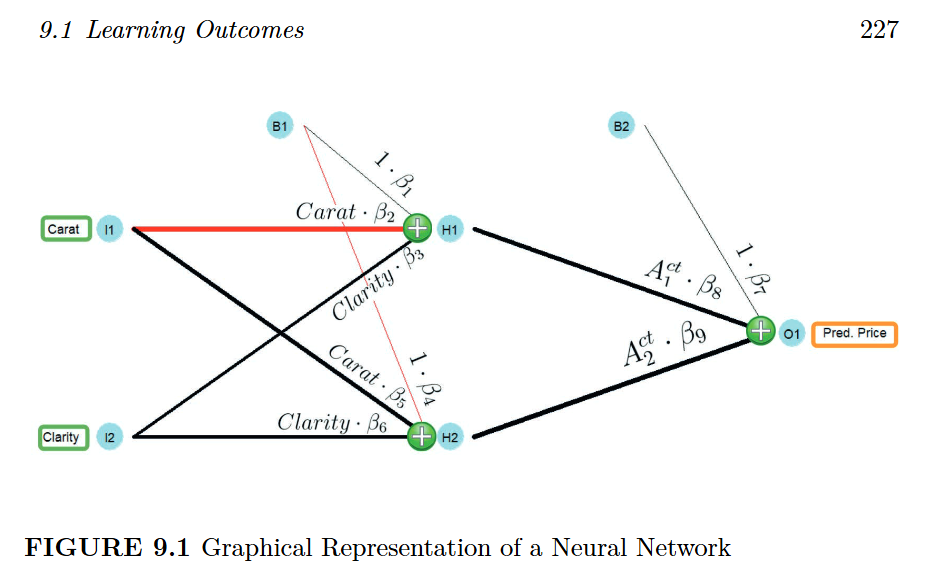

In [291]:
set.seed(777)
DataDiamonds=diamonds |>
clean_names("upper_camel") |>
select(Price, Carat, Clarity) |>
mutate(Clarity=as.numeric(Clarity)) |>
sample_n(500)
Split005= initial_split(DataDiamonds, prop=0.05)
DataTrain=training(Split005)
DataTest=testing(Split005)

In [292]:
RecipeDiamonds=recipe(Price~., data=DataTrain) |>
step_normalize(all_predictors())

In [299]:
ModelDesignNN= mlp(hidden_units=50, epochs=10000, penalty=0) |>
set_engine("nnet") |>
set_mode("regression")

In [300]:
WFModelNN=workflow() |>
add_model(ModelDesignNN) |>
add_recipe(RecipeDiamonds) |>
fit(DataTrain)

In [301]:
DataTrainWithPredNN=augment(WFModelNN, new_data=DataTrain)
metrics(DataTrainWithPredNN, truth=Price, estimate=.pred)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,52.9668451
rsq,standard,0.9997113
mae,standard,18.8673970


In [302]:
DataTestWithPredNN=augment(WFModelNN, new_data=DataTest)
metrics(DataTestWithPredNN, truth=Price, estimate=.pred)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1395.7589915
rsq,standard,0.8951433
mae,standard,883.8321666


In [304]:
library(tidymodels); library(janitor); library(brulee)
set.seed(888)
DataDiamonds=sample_n(diamonds, 500) |>
clean_names("upper_camel") |>
select(Price, Carat, Cut, Color, Clarity) |>
mutate(Cut=as.integer(Cut), Color=as.integer(Color),
Clarity=as.integer(Clarity))
set.seed(888)
Split70=initial_split(DataDiamonds, prop=0.7, strata=Price, breaks=5)
DataTrain=training(Split70)
DataTest=testing(Split70)

In [305]:
RecipeDiamonds=recipe(Price~., data=DataTrain) |>
step_normalize(all_predictors())

In [306]:
# Neural Network Model Design with fallback option

# Try brulee first (requires torch)
if (requireNamespace("brulee", quietly = TRUE) && torch::torch_is_installed()) {
  print("Using brulee engine (torch-based)")
  ModelDesignNN <- mlp(hidden_units = tune(), dropout = tune(),
                       epochs = 100, penalty = 0) |>
    set_engine("brulee") |>
    set_mode("regression")
} else {
  print("Using nnet engine (fallback)")
  ModelDesignNN <- mlp(hidden_units = tune(), penalty = tune(), 
                       epochs = 100) |>
    set_engine("nnet") |>
    set_mode("regression")
}

print(ModelDesignNN)

In [307]:
TuneWFModelNN=workflow() |>
add_model(ModelDesignNN) |>
add_recipe(RecipeDiamonds)

In [324]:
# Step 7 - Tune the Workflow and Train All Models:
# (this step requires patience; run time 5-30 minutes)
set.seed(888)
TuneResultsNN = tune_grid(TuneWFModelNN, resamples = FoldsForTuningNN,
  grid = ParGridNN, metrics = metric_set(rmse, rsq, mae))

# Guard: if all models failed (e.g., torch not loaded for brulee), show notes and stop gracefully
if (inherits(TuneResultsNN, "try-error") ||
    (!is.null(attr(TuneResultsNN, "notes")) && length(attr(TuneResultsNN, "notes")) > 0)) {
  try(show_notes(TuneResultsNN), silent = TRUE)
}

# Step 8 - Extract the Best Hyper-Parameter(s)
BestHyperParNN = select_best(TuneResultsNN, metric = "rmse")
print("Best Hyper-Parameters:")
print(BestHyperParNN)

→ A | error:   Lantern is not loaded. Please use `install_torch()` to install additional dependencies.

There were issues with some computations   A: x1

There were issues with some computations   A: x42



Warning message:
"All models failed. Run `show_notes(.Last.tune.result)` for more information."


ERROR: [1m[33mError[39m in `select_best()`:[22m
[1m[22m[33m![39m `...` must be empty.
[31m✖[39m Problematic argument:
[36m•[39m ..1 = "rmse"
[36mℹ[39m Did you forget to name an argument?


In [323]:
torch::install_torch()
install_torch()

In [325]:
# Robust Torch Installation (Windows/corporate friendly)
# - Longer timeout + Windows download method
# - User-writable TEMP/TORCH_HOME
# - Retry install

options(timeout = max(600, getOption("timeout", 60)))
if (.Platform$OS.type == "windows") {
  options(download.file.method = "wininet")
}

user_home <- Sys.getenv("USERPROFILE", unset = normalizePath("~"))
torch_tmp  <- file.path(user_home, "R-torch-tmp")
torch_home <- file.path(user_home, "R-torch-home")

invisible(dir.create(torch_tmp, recursive = TRUE, showWarnings = FALSE))
invisible(dir.create(torch_home, recursive = TRUE, showWarnings = FALSE))

Sys.setenv(TMP = torch_tmp, TEMP = torch_tmp, TMPDIR = torch_tmp)
Sys.setenv(TORCH_HOME = torch_home)

if (!requireNamespace("torch", quietly = TRUE)) {
  install.packages("torch", repos = "https://cran.r-project.org", quiet = TRUE)
}
library(torch)

ok <- FALSE
for (i in 1:2) {
  message(sprintf("[Attempt %d] Installing libtorch backend...", i))
  try(torch::install_torch(type = "cpu"), silent = TRUE)
  if (torch::torch_is_installed()) { ok <- TRUE; break } else { Sys.sleep(3) }
}

if (ok) {
  cat("\n✓ Torch backend installed successfully at:\n ", torch_home, "\n")
} else {
  cat("\n⚠️ Torch backend installation still failed.\n",
      "Check disk space, antivirus exclusions for ", torch_tmp,
      ", and network access to https://download.pytorch.org/.\n",
      "Fallback to 'nnet' engine should be used for NN.\n", sep = "")
}

[Attempt 1] Installing libtorch backend...

Warning message in utils::download.file(url = url, destfile = destfile):
"the 'wininet' method is deprecated for http:// and https:// URLs"
Warning message in file.copy(from = dir(url, full.names = TRUE), to = file.path(inst_path, :
"problem copying C:\Users\Nasim\AppData\Local\Temp\RtmpEbR4Wj\file20681506b5d\libtorch\share\cmake\Caffe2\Modules_CUDA_fix\README.md to C:\Users\Nasim\R-torch-home\share\cmake\Caffe2\Modules_CUDA_fix\README.md: No space left on device"
Warning message in file.copy(from = dir(url, full.names = TRUE), to = file.path(inst_path, :
"problem creating directory C:\Users\Nasim\R-torch-home\share\cmake\Caffe2\Modules_CUDA_fix\upstream: No space left on device"
Warning message in file.copy(from = dir(url, full.names = TRUE), to = file.path(inst_path, :
"problem copying C:\Users\Nasim\AppData\Local\Temp\RtmpEbR4Wj\file20681506b5d\libtorch\share\cmake\Caffe2\public\LoadHIP.cmake to C:\Users\Nasim\R-torch-home\share\cmake\Caff


✓ Torch backend installed successfully at:
  C:\Users\Nasim/R-torch-home 


In [326]:
DataTitanic=import("https://ai.lange-analytics.com/data/Titanic.csv") |>
clean_names("upper_camel") |>
select(Survived, Sex, Class=Pclass, Age,
Fare=FareInPounds) |>
mutate(Survived=as.logical(Survived)) |>
mutate(Survived=as.factor(Survived))

In [341]:
set.seed(123)
Split7525=initial_split(DataTitanic, strata=Survived)
DataTrain=training(Split7525)
DataTest=testing(Split7525)
head(DataTrain)

,Survived,Sex,Class,Age,Fare
,<fct>,<chr>,<int>,<dbl>,<dbl>
1,FALSE,male,3,27,8.4583
2,FALSE,male,1,54,51.8625
3,FALSE,male,3,2,21.0750
4,FALSE,male,3,20,8.0500
5,FALSE,male,3,39,31.2750
6,FALSE,female,3,14,7.8542


In [342]:
RecipeTitanic=recipe(Survived~., data=DataTrain)


ModelDesignDecTree=decision_tree(tree_depth=3) |>
set_engine("rpart") |>
set_mode("classification")

In [343]:
WfModelTitanic=workflow() |>
add_model(ModelDesignDecTree) |>
add_recipe(RecipeTitanic) |>
fit(DataTrain)

Warning message:
"package 'rpart.plot' is in use and will not be installed"


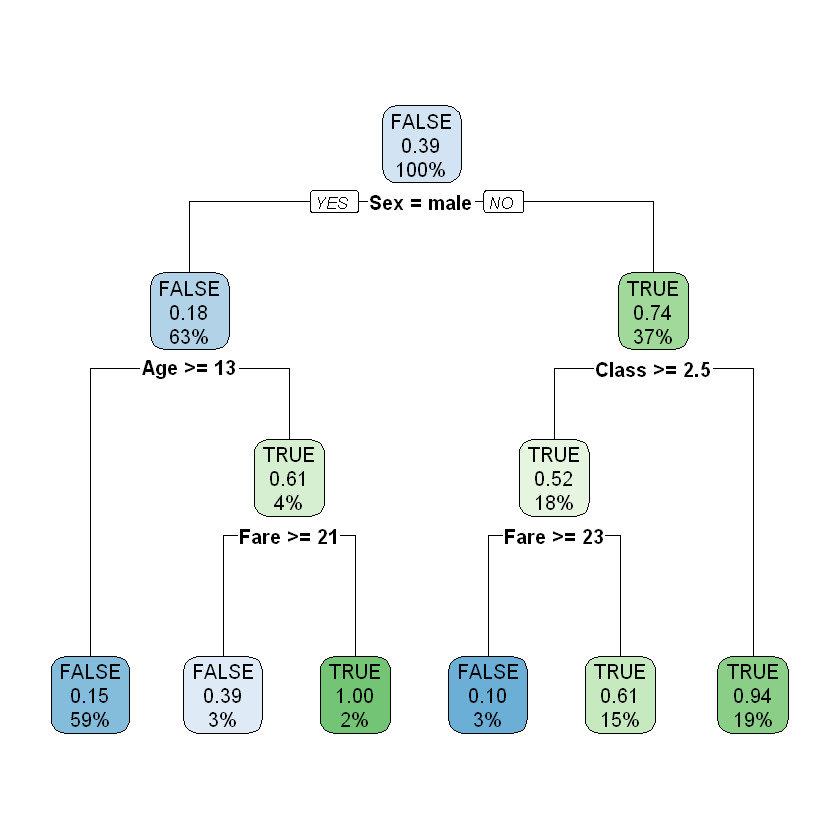

In [344]:
install.packages("rpart.plot")
library(rpart.plot)
rpart.plot(extract_fit_engine(WfModelTitanic),
yes.text="YES", no.text="NO",roundint=FALSE)

In [345]:
DataTestWithPred=augment(WfModelTitanic, new_data=DataTest)
head(DataTestWithPred)

.pred_class,.pred_FALSE,.pred_TRUE,Survived,Sex,Class,Age,Fare
<fct>,<dbl>,<dbl>,<fct>,<chr>,<int>,<dbl>,<dbl>
FALSE,0.84987277,0.1501272,FALSE,male,3,22,7.2500
TRUE,0.05555556,0.9444444,TRUE,female,1,38,71.2833
TRUE,0.05555556,0.9444444,TRUE,female,1,35,53.1000
FALSE,0.84987277,0.1501272,FALSE,male,3,35,8.0500
FALSE,0.61111111,0.3888889,FALSE,male,3,2,29.1250
FALSE,0.84987277,0.1501272,TRUE,male,2,23,13.0000


In [346]:
conf_mat(DataTestWithPred, truth=Survived, estimate=.pred_class)

          Truth
Prediction FALSE TRUE
     FALSE   124   31
     TRUE     13   55

In [347]:
metricSetTitanic=metric_set(accuracy, sensitivity, specificity)
metricSetTitanic(DataTestWithPred, truth=Survived, estimate=.pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8026906
sensitivity,binary,0.9051095
specificity,binary,0.6395349


In [349]:
DataVax=import("https://ai.lange-analytics.com/data/DataVax.rds") |>
select(PercVacFull, PercRep,
PercAsian, PercBlack, PercHisp,
PercYoung25, PercOld65,
PercFoodSt, Population) |>
mutate(Population=frequency_weights(Population))
set.seed(2021)
Split85=initial_split(DataVax, prop=0.85, strata=PercVacFull, breaks=3)
DataTrain=training(Split85)
DataTest=testing(Split85)

Warning message:
"Missing `trust` will be set to FALSE by default for RDS in 2.0.0."


In [350]:
RecipeVax=recipe(PercVacFull~., data=DataTrain)

In [353]:
install.packages("ranger")

Installing package into 'C:/Users/Nasim/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

Warning message in download.file(url, destfile, method, mode = "wb", ...):
"the 'wininet' method is deprecated for http:// and https:// URLs"
Warning message in download.file(url, destfile, method, mode = "wb", ...):
"the 'wininet' method is deprecated for http:// and https:// URLs"


package 'ranger' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Nasim\AppData\Local\Temp\RtmpEbR4Wj\downloaded_packages

The downloaded binary packages are in
	C:\Users\Nasim\AppData\Local\Temp\RtmpEbR4Wj\downloaded_packages


In [359]:
ModelDesignRandFor=rand_forest(min_n=5, mtry=2, trees=2000) |>
set_engine("ranger", num.threads=parallel::detectCores() ) |>
set_mode("regression")

In [361]:
set.seed(2021)
WfModelVax=workflow() |>
add_recipe(RecipeVax) |>
add_model(ModelDesignRandFor) |>
add_case_weights(Population) |>
fit(DataTrain)

WfModelVax

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: rand_forest()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Case Weights ────────────────────────────────────────────────────────────────
Population

── Model ───────────────────────────────────────────────────────────────────────
Ranger result

Call:
 ranger::ranger(x = maybe_data_frame(x), y = y, mtry = min_cols(~2,      x), num.trees = ~2000, min.node.size = min_rows(~5, x), num.threads = ~parallel::detectCores(),      verbose = FALSE, seed = sample.int(10^5, 1), case.weights = weights) 

Type:                             Regression 
Number of trees:                  2000 
Sample size:                      2234 
Number of independent variables:  7 
Mtry:                             2 
Target node size:                 5 
Variable importance mode:         none 
Splitrule:                        variance 
OOB prediction err

In [362]:
DataTestWithPred=augment(WfModelVax, new_data=DataTest)
metrics(DataTestWithPred, truth=PercVacFull, estimate=.pred)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.10955102
rsq,standard,0.45584813
mae,standard,0.07531759


In [363]:
DataVax=import("https://ai.lange-analytics.com/data/DataVax.rds") |>
select(PercVacFull, PercRep,
PercAsian, PercBlack, PercHisp,
PercYoung25, PercOld65,
PercFoodSt, Population) |>
mutate(Population=frequency_weights(Population))

Warning message:
"Missing `trust` will be set to FALSE by default for RDS in 2.0.0."


In [364]:
set.seed(2021)
Split85=initial_split(DataVax, prop=0.85, strata=PercVacFull,
breaks=3)
DataTrain=training(Split85)
DataTest=testing(Split85)

In [365]:
RecipeVax=recipe(PercVacFull~., data=DataTrain)

In [366]:
ModelDesignBoostTrees=boost_tree(trees=tune(), tree_depth=tune())|>
set_engine("xgboost") |>
set_mode("regression")

In [367]:
WfModelVax=workflow() |>
add_model(ModelDesignBoostTrees) |>
add_recipe(RecipeVax) |>
add_case_weights(Population)

Warning message:
"! tune detected a parallel backend registered with foreach but no backend
  registered with future.
ℹ Support for parallel processing with foreach was soft-deprecated in tune
  1.2.1.
ℹ See ?parallelism (`?tune::parallelism()`) to learn more."


[1] "TUNING RESULTS:"
[1] "TUNING TIME:"
Time difference of 15.20894 secs
[1] "BEST PARAMETERS:"
[1] "TUNING TIME:"
Time difference of 15.20894 secs
[1] "BEST PARAMETERS:"
# A tibble: 1 × 3
  trees tree_depth .config              
  <dbl>      <dbl> <chr>                
1    50          2 Preprocessor1_Model09
[1] "TESTING DATA METRICS BEST MODEL:"
# A tibble: 1 × 3
  trees tree_depth .config              
  <dbl>      <dbl> <chr>                
1    50          2 Preprocessor1_Model09
[1] "TESTING DATA METRICS BEST MODEL:"
# A tibble: 3 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard      0.114 
2 rsq     standard      0.407 
3 mae     standard      0.0781
# A tibble: 3 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard      0.114 
2 rsq     standard      0.407 
3 mae     standard      0.0781


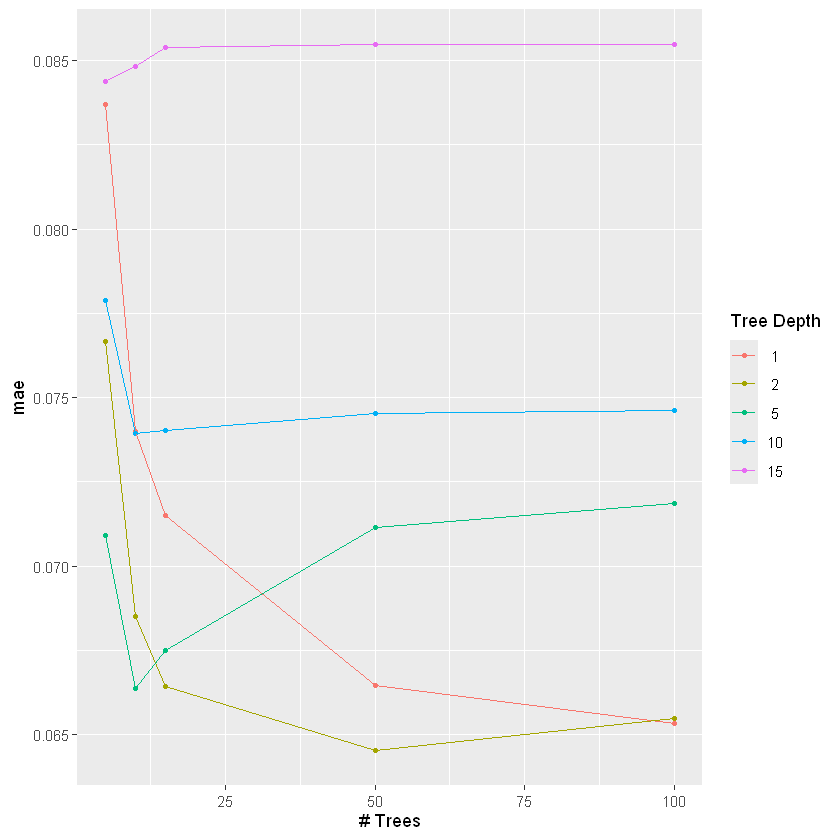

In [368]:
# Step 5 - Create a Hyper-Parameter Grid
set.seed(2021)
ParGridVax=expand.grid(tree_depth=c(1, 2, 5, 10, 15),
trees=c(5, 10, 15, 50, 100))
# Step 6 - Create Resamples for Cross-Validation:
FoldsVax=DataTrain |>
vfold_cv(v=10, strata=PercVacFull, breaks=5)


# Step 7 - Tune the Workflow and Train All Models:
# Make sure the doParallel package is installed!!!
doParallel::registerDoParallel()
set.seed(2021)
StartTime=Sys.time()
TuneResultsVax=tune_grid(WfModelVax,
resamples=FoldsVax,
grid=ParGridVax,
metrics=metric_set(mae))
RunTime=Sys.time()- StartTime
# Visualize tuning results
print("TUNING RESULTS:")
autoplot(TuneResultsVax)
# Step 8 - Extract the Best Hyper-Parameter(s):
BestParVax=select_best(TuneResultsVax, metric="mae")
# Step 9 - Finalize and Train the Best Workflow Model:
set.seed(2021)
BestWFModelVax=finalize_workflow(WfModelVax, BestParVax) |>
fit(DataTrain)
# Step 10 - Assess Prediction Quality Based on the Testing Data:
DataTestWithPred=augment(BestWFModelVax, new_data=DataTest)
MetricsBestModel=metrics(DataTestWithPred, truth=PercVacFull,
estimate=.pred)
# Print computation time
print("TUNING TIME:")
print(RunTime)
# Best parameters from tuning
print("BEST PARAMETERS:")
print(BestParVax)
# Print metrics for best model
print("TESTING DATA METRICS BEST MODEL:")
print(MetricsBestModel)

In [371]:
install.packages("wooldridge")
library(wooldridge)
DataWage=wage1 |>
clean_names("upper_camel") |>
select(Wage, Educ, Tenure, Female) |>
mutate(Female=as.factor(Female))

Installing package into 'C:/Users/Nasim/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



Warning message in download.file(url, destfile, method, mode = "wb", ...):
"the 'wininet' method is deprecated for http:// and https:// URLs"


package 'wooldridge' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Nasim\AppData\Local\Temp\RtmpEbR4Wj\downloaded_packages

The downloaded binary packages are in
	C:\Users\Nasim\AppData\Local\Temp\RtmpEbR4Wj\downloaded_packages


Warning message:
"package 'wooldridge' was built under R version 4.4.3"


In [372]:
set.seed(777)
Split7525=initial_split(DataWage, prop=0.75, strata=Wage)
DataTrain=training(Split7525)
DataTest=testing(Split7525)

In [ ]:
ModelDesignRF=rand_forest() |>
set_engine("ranger", num.threads=parallel::detectCores(),
importance="impurity") |>
set_mode("regression")


RecipeWage=recipe(Wage~., data=DataTrain)

set.seed(777)
WfModelWageRF=workflow() |>
add_model(ModelDesignRF)|>
add_recipe(RecipeWage) |>
fit(DataTrain)

In [375]:
ObsHelga=tibble(Wage=8.9, Educ=17, Tenure=18,
Female=factor(1, levels=c(0,1)))
print(ObsHelga)

# A tibble: 1 × 4
   Wage  Educ Tenure Female
  <dbl> <dbl>  <dbl> <fct> 
1   8.9    17     18 1     


In [376]:
ObsHelga=augment(WfModelWageRF, new_data=ObsHelga)
print(ObsHelga)

# A tibble: 1 × 5
  .pred  Wage  Educ Tenure Female
  <dbl> <dbl> <dbl>  <dbl> <fct> 
1  8.51   8.9    17     18 1     


Installing package into 'C:/Users/Nasim/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



also installing the dependencies 'iBreakDown', 'ingredients', 'kernelshap'


Warning message in download.file(url, destfile, method, mode = "wb", ...):
"the 'wininet' method is deprecated for http:// and https:// URLs"
Warning message in download.file(url, destfile, method, mode = "wb", ...):
"the 'wininet' method is deprecated for http:// and https:// URLs"
Warning message in download.file(url, destfile, method, mode = "wb", ...):
"the 'wininet' method is deprecated for http:// and https:// URLs"
Warning message in download.file(url, destfile, method, mode = "wb", ...):
"the 'wininet' method is deprecated for http:// and https:// URLs"
Warning message in download.file(url, destfile, method, mode = "wb", ...):
"the 'wininet' method is deprecated for http:// and https:// URLs"
Warning message in download.file(url, destfile, method, mode = "wb", ...):
"the 'wininet' method is deprecated for http:// and https:// URLs"
Warning message in download.file(url, destfile, method, mode = "wb", ..

package 'iBreakDown' successfully unpacked and MD5 sums checked
package 'ingredients' successfully unpacked and MD5 sums checked
package 'ingredients' successfully unpacked and MD5 sums checked
package 'kernelshap' successfully unpacked and MD5 sums checked
package 'kernelshap' successfully unpacked and MD5 sums checked
package 'DALEX' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Nasim\AppData\Local\Temp\RtmpEbR4Wj\downloaded_packages
package 'DALEX' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Nasim\AppData\Local\Temp\RtmpEbR4Wj\downloaded_packages


Warning message:
"package 'DALEX' was built under R version 4.4.3"
Welcome to DALEX (version: 2.5.2).
Find examples and detailed introduction at: http://ema.drwhy.ai/
Additional features will be available after installation of: ggpubr.
Use 'install_dependencies()' to get all suggested dependencies


Attaching package: 'DALEX'


The following object is masked from 'package:dplyr':

    explain


Welcome to DALEX (version: 2.5.2).
Find examples and detailed introduction at: http://ema.drwhy.ai/
Additional features will be available after installation of: ggpubr.
Use 'install_dependencies()' to get all suggested dependencies


Attaching package: 'DALEX'


The following object is masked from 'package:dplyr':

    explain




Preparation of a new explainer is initiated
  -> model label       :  ranger  (  default  )
  -> data              :  393  rows  4  cols 
  -> target variable   :  393  values 
  -> predict function  :  yhat.ranger  will be used (  default  )
  -> predicted values  :  No value for predict function target column. (  default  )
  -> model_info        :  package ranger , ver. 0.17.0 , task regression (  default  ) 
  -> predicted values  :  numerical, min =  3.712271 , mean =  5.919091 , max =  14.13088  
  -> residual function :  difference between y and yhat (  default  )
  -> residuals         :  numerical, min =  -6.549584 , mean =  0.01681252 , max =  12.34008  
  A new explainer has been created!  


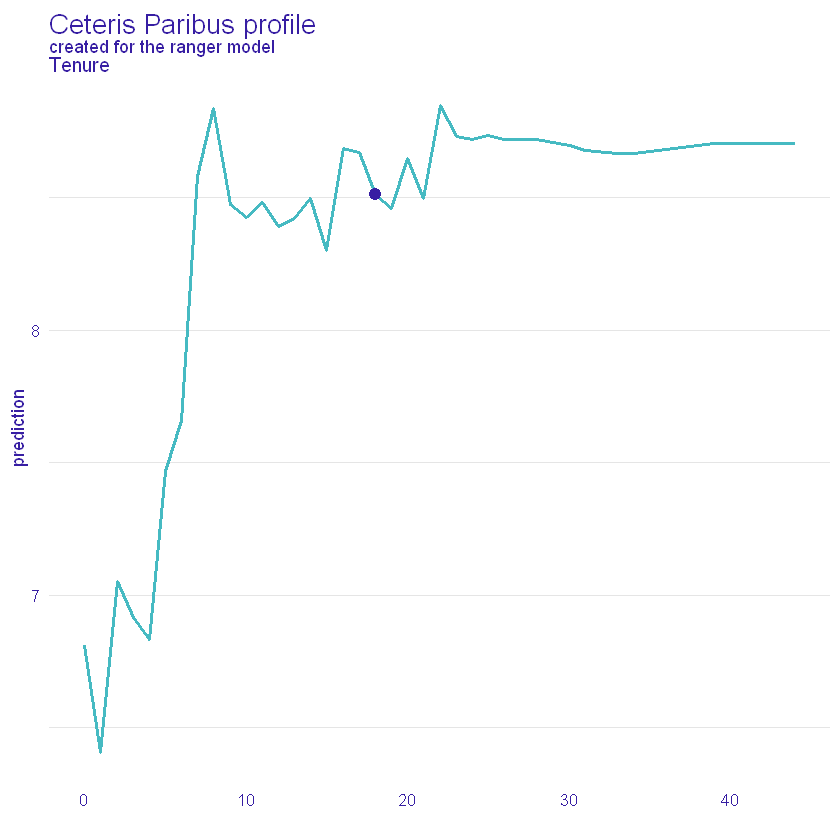

In [ ]:
install.packages("DALEX")
library(DALEX)
ExplainerRF=DALEX::explain(extract_fit_engine(WfModelWageRF),
            data=DataTrain, y=DataTrain$Wage)

CPPlot=predict_profile(explainer=ExplainerRF,
    new_observation=ObsHelga,
    variables="Tenure")
plot(CPPlot, variables="Tenure")

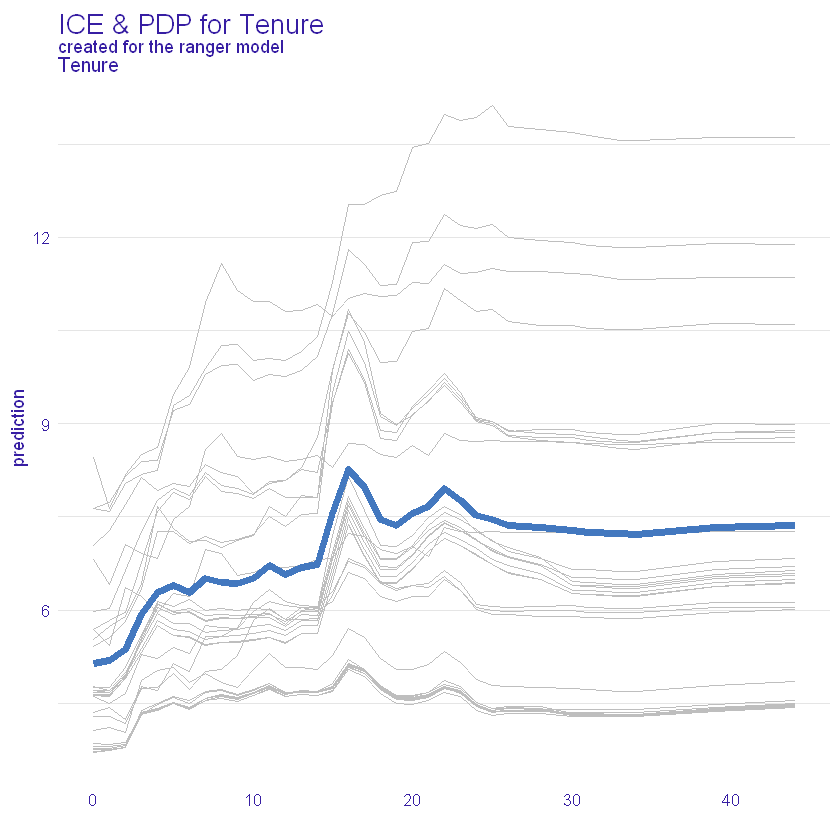

In [380]:
library(DALEX)
ICEPDPPlot=model_profile(explainer=ExplainerRF, variables="Tenure", N=NULL)
plot(ICEPDPPlot,geom="profiles")+ggtitle("ICE & PDP for Tenure")

Installing package into 'C:/Users/Nasim/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

Warning message in download.file(url, destfile, method, mode = "wb", ...):
"the 'wininet' method is deprecated for http:// and https:// URLs"
Warning message in download.file(url, destfile, method, mode = "wb", ...):
"the 'wininet' method is deprecated for http:// and https:// URLs"


package 'vip' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Nasim\AppData\Local\Temp\RtmpEbR4Wj\downloaded_packages

The downloaded binary packages are in
	C:\Users\Nasim\AppData\Local\Temp\RtmpEbR4Wj\downloaded_packages


Warning message:
"package 'vip' was built under R version 4.4.3"

Attaching package: 'vip'


The following object is masked from 'package:DALEX':

    titanic



Attaching package: 'vip'


The following object is masked from 'package:DALEX':

    titanic


The following object is masked from 'package:utils':

    vi


The following object is masked from 'package:utils':

    vi




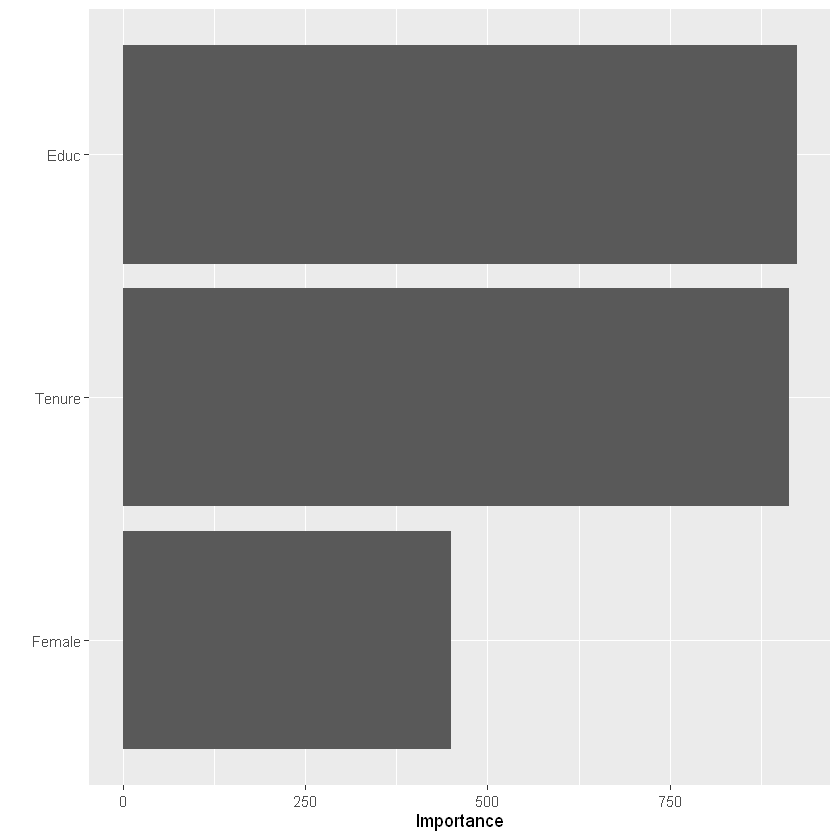

In [382]:
install.packages("vip")
library(vip)
vip(extract_fit_engine(WfModelWageRF))

In [383]:
ModelDesignRF=rand_forest() |>
set_engine("ranger", num.threads=parallel::detectCores(),
importance="permutation") |>
set_mode("regression")

In [384]:
set.seed(777)
WfModelWageRF=workflow() |>
add_model(ModelDesignRF)|>
add_recipe(RecipeWage) |>
fit(DataTrain)

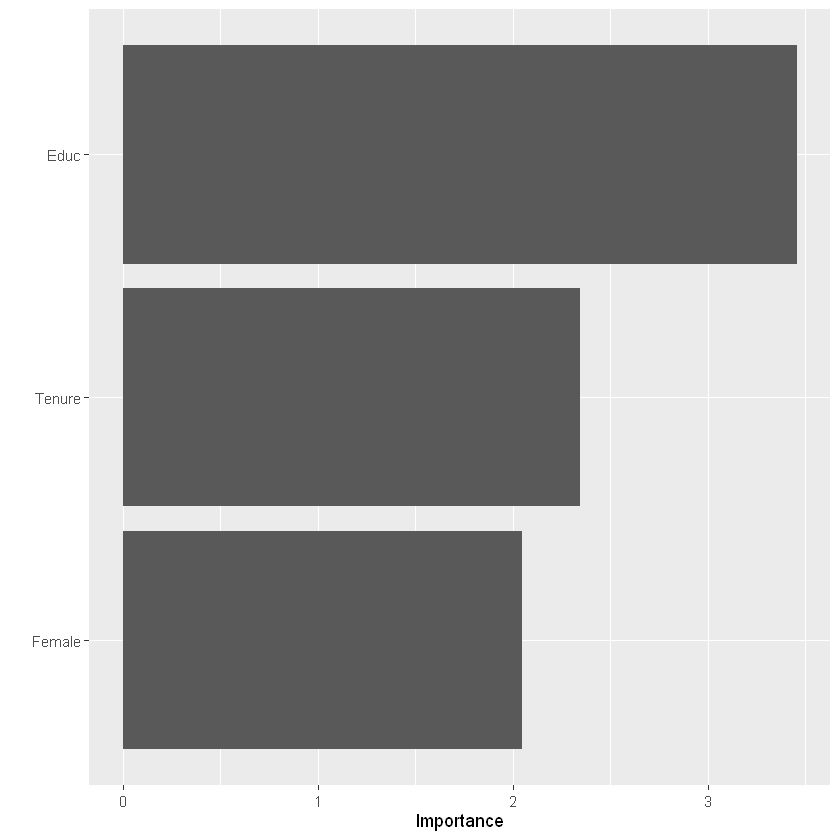

In [385]:
library(vip)
vip(extract_fit_engine(WfModelWageRF), metric="rmse")

In [386]:
print(ObsHelga)

# A tibble: 1 × 5
  .pred  Wage  Educ Tenure Female
  <dbl> <dbl> <dbl>  <dbl> <fct> 
1  8.51   8.9    17     18 1     


In [387]:
CoalitionETF=predict(WfModelWageRF, new_data=ObsHelga)
cat("Helga's predicted wage from Coalition ETF is:",
round(CoalitionETF[[1]],2))

Helga's predicted wage from Coalition ETF is: 8.51

In [388]:
CoalitionNone=mean(DataTrain$Wage)
cat("Helga's predicted wage for Coalition `none` is:",
round(CoalitionNone,2))

Helga's predicted wage for Coalition `none` is: 5.94

In [390]:
install.packages('DALEXtra')
library(DALEX); library(DALEXtra)
DataVax=import("https://ai.lange-analytics.com/data/DataVax.rds") |>
select(PercVacFull, PercRep,
PercAsian, PercBlack, PercHisp, PercYoung25, PercOld65,
PercFoodSt, Population) |>
mutate(Population=frequency_weights(Population))
set.seed(2021)
Split85=DataVax |> initial_split(prop=0.85,
strata=PercVacFull,
breaks=3)
DataTrain=training(Split85)
DataTest=testing(Split85)

Installing package into 'C:/Users/Nasim/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



Warning message in download.file(url, destfile, method, mode = "wb", ...):
"the 'wininet' method is deprecated for http:// and https:// URLs"


package 'DALEXtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Nasim\AppData\Local\Temp\RtmpEbR4Wj\downloaded_packages

The downloaded binary packages are in
	C:\Users\Nasim\AppData\Local\Temp\RtmpEbR4Wj\downloaded_packages


Warning message:
"package 'DALEXtra' was built under R version 4.4.3"
Warning message:
"Missing `trust` will be set to FALSE by default for RDS in 2.0.0."
Warning message:
"Missing `trust` will be set to FALSE by default for RDS in 2.0.0."


In [391]:
set.seed(2021)
RecipeVax=recipe(PercVacFull~., data=DataTrain)
library(parallel)
ModelDesignRandFor=rand_forest(min_n=5, mtry=2, trees=2000) |>
set_engine("ranger", num.threads=parallel::detectCores()) |>
set_mode("regression")
WfModelVax=workflow() |>
add_model(ModelDesignRandFor) |>
add_recipe(RecipeVax) |>
fit(DataTrain)

In [392]:
DataTrainPredOnly=select(DataTrain, -PercVacFull, -Population)
ExplainerRandForest=explain_tidymodels(WfModelVax,
data=DataTrainPredOnly,y=DataTrain$PercVacFull,
verbose=FALSE)

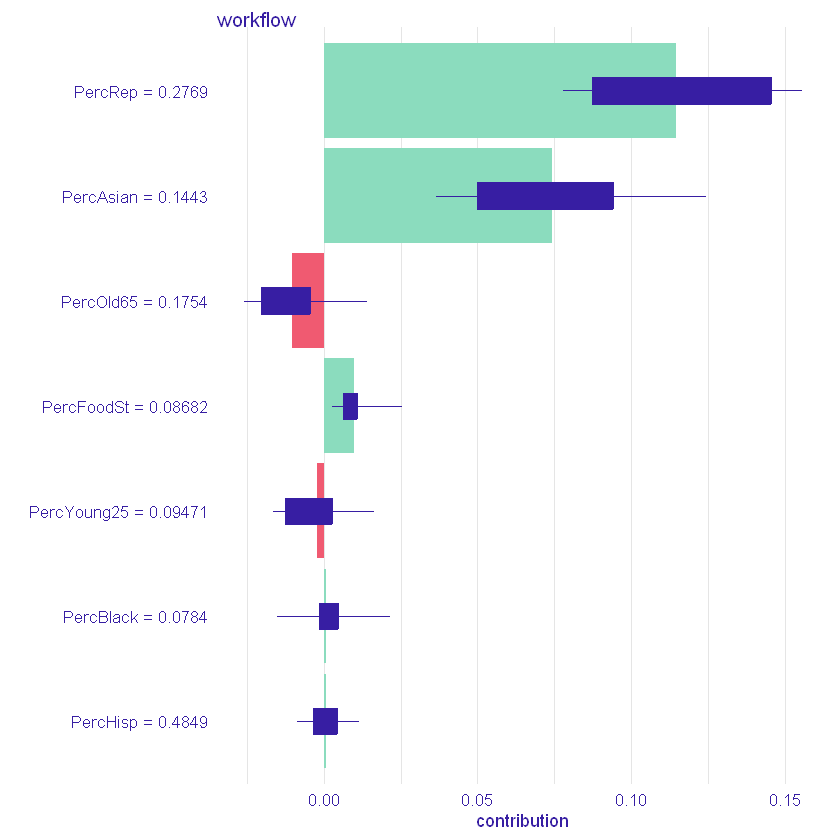

In [393]:
set.seed(2021)
CountyID=133
SHAPObject=predict_parts(
explainer=ExplainerRandForest,
new_observation=DataVax[CountyID,],
type="shap", B=25)
plot(SHAPObject)